In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as K

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
from keras.utils import to_categorical

In [5]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
num_classes = len(classes)
print('Total number of outputs : ', num_classes)
print('Output classes : ', num_classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  10


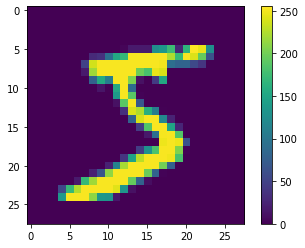

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape,name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu',name="dense_1"))
    model.add(Dense(num_classes, activation='softmax',name="dense_2"))
    
    return model

model1=create_model()

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,608,778
Trainable params: 1,608,778
Non-trainable params: 0
_________________________________________________________________


In [10]:
adam = keras.optimizers.Adam(lr=0.001)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [11]:
history1=model1.fit(x_train,y_train,batch_size=256,epochs=100,shuffle=True,
                    validation_data=(x_test, y_test))

Epoch 1/100
235/235 [==============================] - 36s 151ms/step - loss: 0.5110 - accuracy: 0.8611 - val_loss: 0.0965 - val_accuracy: 0.9710
Epoch 2/100
235/235 [==============================] - 35s 147ms/step - loss: 0.0824 - accuracy: 0.9764 - val_loss: 0.0567 - val_accuracy: 0.9816
Epoch 3/100
235/235 [==============================] - 36s 152ms/step - loss: 0.0509 - accuracy: 0.9862 - val_loss: 0.0688 - val_accuracy: 0.9765
Epoch 4/100
235/235 [==============================] - 35s 147ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0447 - val_accuracy: 0.9844
Epoch 5/100
235/235 [==============================] - 35s 149ms/step - loss: 0.0281 - accuracy: 0.9921 - val_loss: 0.0536 - val_accuracy: 0.9835
Epoch 6/100
235/235 [==============================] - 34s 145ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 7/100
235/235 [==============================] - 35s 150ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.0494 -

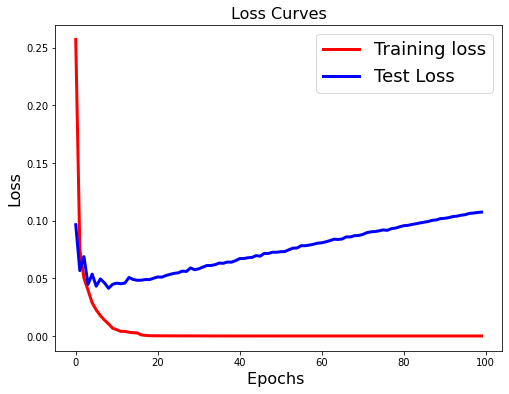

In [12]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Test Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig("random_label_loss.png")